**Assignment 5**
**Submited By : Om Nimmalwar**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("All_DataSets/covid19_Confirmed_dataset.csv")
df.head()
df.shape

(266, 104)

In [3]:
Death_df = pd.read_csv("All_DataSets/covid19_deaths_dataset.csv")
Death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [8]:
#remove lat long column as they are not of any use
# drop_column = df.drop(["Province/State","Lat","Long"],axis = 1, inplace = True)
df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [10]:
New_df = df.groupby("Country/Region").sum()
New_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [11]:
New_df.shape

(187, 100)

Text(0.5, 1.0, 'Confirm Cases')

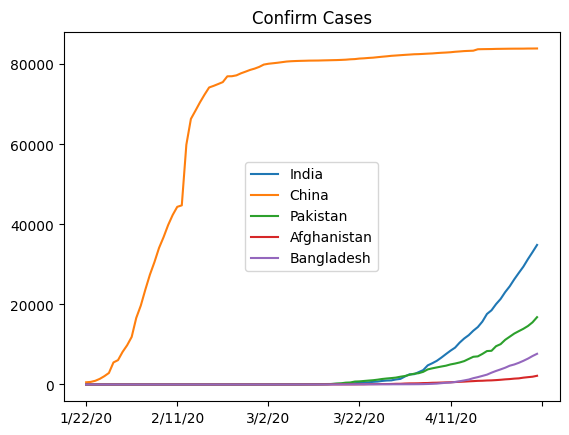

In [14]:
# Checking For Countries Near India
New_df.loc["India"].plot()
New_df.loc["China"].plot()
New_df.loc["Pakistan"].plot()
New_df.loc["Afghanistan"].plot()
New_df.loc["Bangladesh"].plot()
plt.legend()
plt.title("Confirm Cases")

<Axes: >

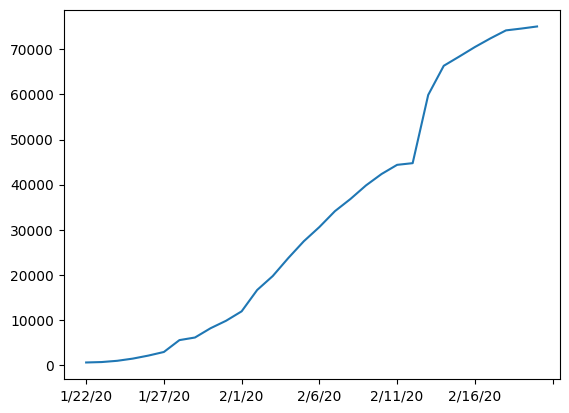

In [15]:
New_df.loc['China'][:30].plot()

<Axes: >

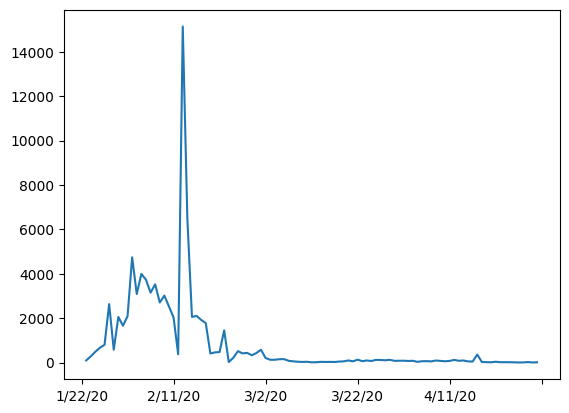

In [16]:
#camlculate the first derivate of the curve
New_df.loc['China'].diff().plot()

In [17]:
#maximum Infection Rate
New_df.loc['China'].diff().max()

np.float64(15136.0)

In [21]:
# For India
New_df.loc['India'].diff().max()

np.float64(1893.0)

In [24]:
Countries = list(New_df.index)
max_infection_rate = []
for x in Countries:
    max_infection_rate.append(New_df.loc[x].diff().max())
New_df['Max_Infection_Rates'] = max_infection_rate

In [26]:
New_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_Infection_Rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [30]:
Confirm_Data = pd.DataFrame(New_df["Max_Infection_Rates"])

In [31]:
Confirm_Data

,Max_Infection_Rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [33]:
Hapiness = pd.read_csv("All_DataSets/worldwide_happiness_report.csv")
Hapiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [34]:
# drop the useless column
usless = ["Overall rank","Score","Generosity","Perceptions of corruption"]

In [36]:
Hapiness.drop(usless,axis =1,inplace = True)

In [38]:
Hapiness.set_index("Country or region",inplace = True)

In [39]:
Hapiness.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [40]:
# Join two dataset 
Confirm_Data.shape

(187, 1)

In [41]:
Hapiness.shape

(156, 4)

In [43]:
Data = Confirm_Data.join(Hapiness,how ="inner")
Data

,Max_Infection_Rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,29.0,0.960,1.427,0.805,0.154
Vietnam,19.0,0.741,1.346,0.851,0.543
Yemen,5.0,0.287,1.163,0.463,0.143
Zambia,9.0,0.578,1.058,0.426,0.431


In [44]:
Data.corr()

,Max_Infection_Rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_Infection_Rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


<Axes: xlabel='GDP per capita', ylabel='Max_Infection_Rates'>

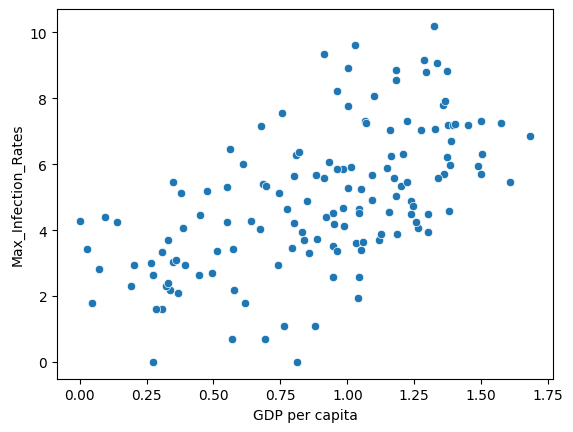

In [50]:
# visulization
x = Data["GDP per capita"]
y = Data["Max_Infection_Rates"]
sns.scatterplot(x=x,y=np.log(y))

<Axes: xlabel='GDP per capita', ylabel='Max_Infection_Rates'>

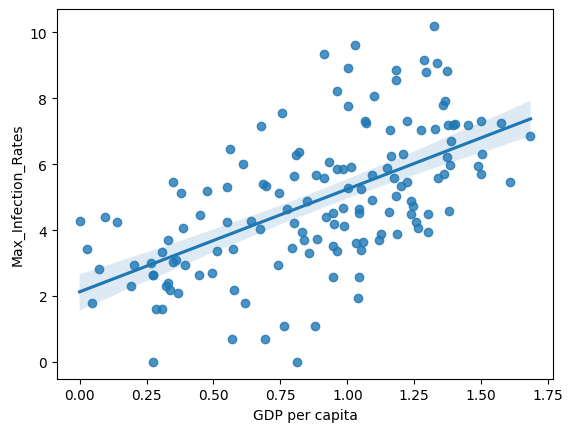

In [51]:
sns.regplot(x=x,y=np.log(y))

<Axes: xlabel='Social support', ylabel='Max_Infection_Rates'>

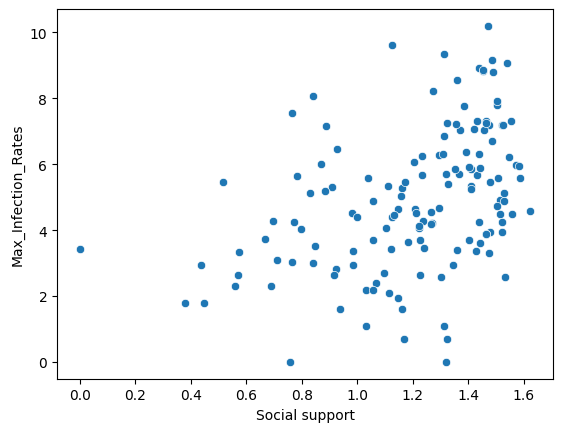

In [52]:
# visulization
x = Data["Social support"]
y = Data["Max_Infection_Rates"]
sns.scatterplot(x=x,y=np.log(y))

<Axes: xlabel='Social support', ylabel='Max_Infection_Rates'>

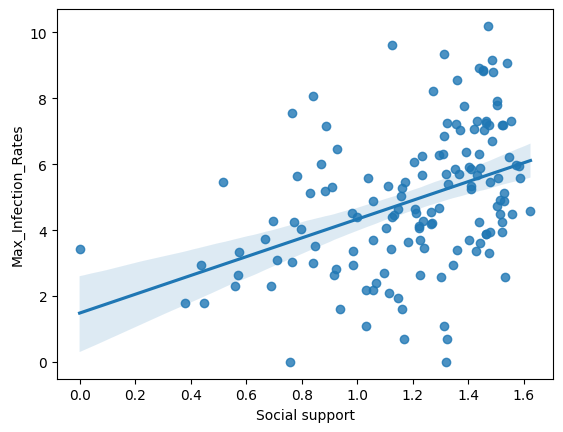

In [53]:
sns.regplot(x=x,y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='Max_Infection_Rates'>

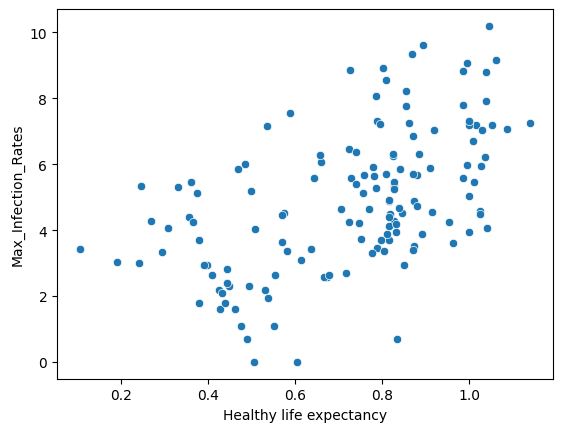

In [54]:
# visulization
x = Data["Healthy life expectancy"]
y = Data["Max_Infection_Rates"]
sns.scatterplot(x=x,y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='Max_Infection_Rates'>

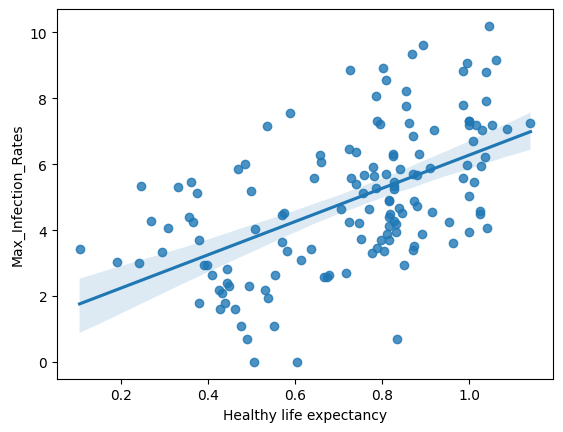

In [55]:
sns.regplot(x=x,y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='Max_Infection_Rates'>

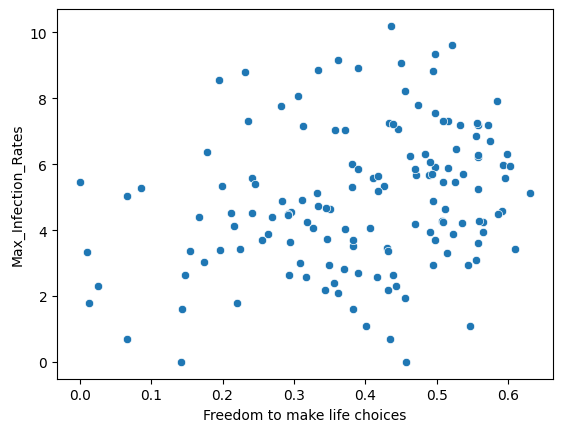

In [56]:
# visulization
x = Data["Freedom to make life choices"]
y = Data["Max_Infection_Rates"]
sns.scatterplot(x=x,y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='Max_Infection_Rates'>

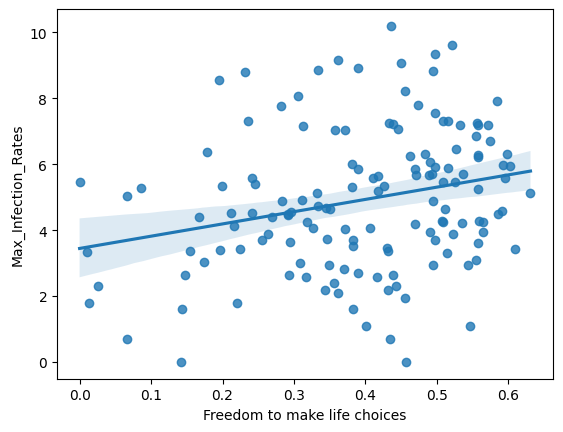

In [57]:
sns.regplot(x=x,y=np.log(y))